In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Excel file into a Pandas DataFrame
file_path = 'estudantes.xlsx'
df = pd.read_excel(file_path)

In [6]:
# Display the first few rows of the dataset
print("Sample of the dataset:")
df.head()

Sample of the dataset:


,ano_letivo,ano_curricular,nuts_II,nivel_ensino,curso,setor,resultado,#estudantes
0,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,abandona,1032
1,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,retido,43
2,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,transita,5303
3,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Público,abandona,1773
4,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Público,retido,280


In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())


Missing values in the dataset:


ano_letivo        0
ano_curricular    0
nuts_II           0
nivel_ensino      0
curso             0
setor             0
resultado         0
#estudantes       0
dtype: int64

In [8]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,ano_letivo,ano_curricular,#estudantes
count,5871.000000,5871.000000,5871.000000
mean,2013.167774,7.337932,2832.696985
std,3.300708,3.348969,5872.984546
min,2008.000000,1.000000,11.000000
25%,2010.000000,5.000000,141.000000
50%,2013.000000,8.000000,567.000000
75%,2016.000000,10.000000,2652.500000
max,2019.000000,12.000000,38793.000000


In [9]:
# Convert the 'ano_letivo' column to a range format (e.g., 2008-2009)
df['academic_year'] = df['ano_letivo'].astype(str) + '-' + (df['ano_letivo'] + 1).astype(str)

In [11]:
df.head()

,ano_letivo,ano_curricular,nuts_II,nivel_ensino,curso,setor,resultado,#estudantes,academic_year
0,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,abandona,1032,2008-2009
1,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,retido,43,2008-2009
2,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,transita,5303,2008-2009
3,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Público,abandona,1773,2008-2009
4,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Público,retido,280,2008-2009


## BI Questions

### 1. What are the outcomes in the public sector versus the private sector?
We count how many students fall into different outcome categories (like 'abandon,' 'retained,' or 'progressed') within each sector (public and private). This gives us a clear picture of the distribution of outcomes for students in both types of schools.

In [15]:
# 1. Outcomes in Public Sector vs. Private Sector
outcome_by_sector = df.groupby(['setor', 'resultado']).size().reset_index(name='Count')
print("\nOutcomes in Public Sector vs. Private Sector:")
display(outcome_by_sector)


Outcomes in Public Sector vs. Private Sector:


,setor,resultado,Count
0,Privado,abandona,992
1,Privado,retido,652
2,Privado,transita,1004
3,Público,abandona,1125
4,Público,retido,998
5,Público,transita,1100


### 2. What is the success percentage in different NUTS II regions?
Group the data by NUTS II region and Outcome to analyze the success percentage.
Calculate the success percentage by dividing the count of each outcome by the total count for each NUTS II region.

In [16]:
# Group by NUTS II region and Outcome, calculate success percentage
success_percentage_by_region = df.groupby(['nuts_II', 'resultado']).size() / df.groupby('nuts_II').size()
success_percentage_by_region = success_percentage_by_region.reset_index(name='SuccessPercentage')

# Display the success percentage by region
print("\nSuccess Percentage in Different NUTS II Regions:")
display(success_percentage_by_region)


Success Percentage in Different NUTS II Regions:


,nuts_II,resultado,SuccessPercentage
0,A.M. Lisboa,abandona,0.348782
1,A.M. Lisboa,retido,0.298507
2,A.M. Lisboa,transita,0.352710
3,Alentejo,abandona,0.354008
4,Alentejo,retido,0.284351
5,Alentejo,transita,0.361641
6,Algarve,abandona,0.394659
7,Algarve,retido,0.230465
8,Algarve,transita,0.374876
9,Centro,abandona,0.364524


In [22]:
df['curso'].unique()

array(['Cursos gerais', 'Outros', 'Cursos científico-humanísticos'],
      dtype=object)

In [23]:
# Filter data for General courses (B), Scientific-humanistic courses (S), and others
filtered_courses = df[df['curso'].isin(['Cursos gerais', 'Cursos científico-humanísticos', 'Outros'])]

In [24]:
filtered_courses

,ano_letivo,ano_curricular,nuts_II,nivel_ensino,curso,setor,resultado,#estudantes,academic_year
0,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,abandona,1032,2008-2009
1,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,retido,43,2008-2009
2,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Privado,transita,5303,2008-2009
3,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Público,abandona,1773,2008-2009
4,2008,1,A.M. Lisboa,Ensino básico,Cursos gerais,Público,retido,280,2008-2009
...,...,...,...,...,...,...,...,...,...
5866,2019,12,Norte,Ensino secundário,Cursos científico-humanísticos,Público,transita,17262,2019-2020
5867,2019,12,Norte,Ensino secundário,Outros,Privado,abandona,3121,2019-2020
5868,2019,12,Norte,Ensino secundário,Outros,Privado,transita,8912,2019-2020
5869,2019,12,Norte,Ensino secundário,Outros,Público,abandona,7351,2019-2020


In [25]:
# Group by academic year and course, calculate the number of students
enrolled_students_evolution = filtered_courses.groupby(['academic_year', 'curso']).agg({'#estudantes': 'sum'}).reset_index()

In [26]:
# Pivot the table for better visualization
pivot_table = enrolled_students_evolution.pivot(index='academic_year', columns='curso', values='#estudantes')

In [28]:
pivot_table

curso,Cursos científico-humanísticos,Cursos gerais,Outros
academic_year,,,
2008-2009,182566,1003862,391891
2009-2010,185993,1003646,362369
2010-2011,186345,996609,305993
2011-2012,187436,984167,265140
2012-2013,189619,971086,228758
2013-2014,189582,945935,215886
2014-2015,192689,922069,232213
2015-2016,195193,897235,224936
2016-2017,196555,891249,226771


<Figure size 1200x600 with 0 Axes>

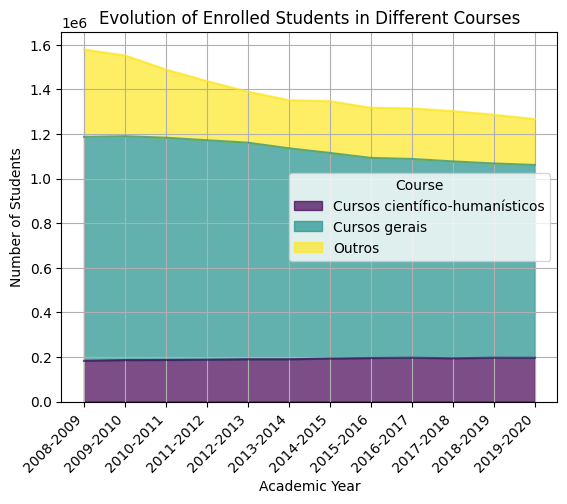

In [30]:
# Plot the evolution of enrolled students in different courses using a stacked area plot
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)

# Customize the plot
plt.title('Evolution of Enrolled Students in Different Courses')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.legend(title='Course')
plt.grid(True)

# Adjust the position of the years on the x-axis
plt.xticks(range(len(pivot_table.index)), pivot_table.index, rotation=45, ha='right')

plt.show()
